# 0. titanic

## 데이터셋 출처

* https://www.kaggle.com/competitions/titanic

In [56]:
# 필요한 라이브러리를 로드합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
# 데이터셋을 로드합니다.
train = pd.read_csv("data/titanic/train.csv", index_col="PassengerId")
test = pd.read_csv("data/titanic/test.csv", index_col="PassengerId")

# 1. 간단하게 성별로만 나누기

<AxesSubplot:xlabel='Survived', ylabel='count'>

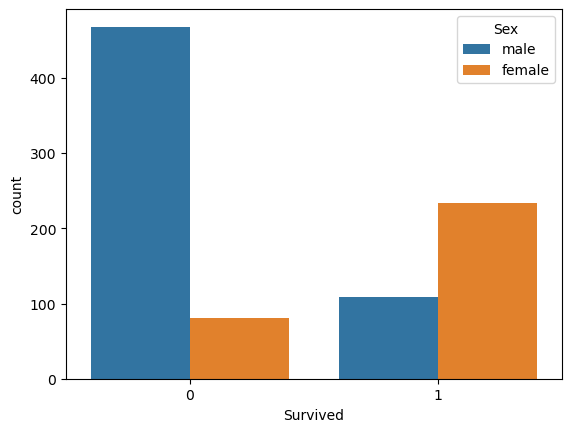

In [58]:
sns.countplot(data=train, x="Survived", hue="Sex")

실제로 타이타닉에서 남성이 여성 및 어린아이들을 구출해주었다고 한다.

그래서 남성 생존자 비율이 낮은 것

In [59]:
test["Survived"] = (test["Sex"] == "female").astype(int)

In [60]:
submit = test["Survived"]
submit.to_csv("data/titanic/submit1.csv")

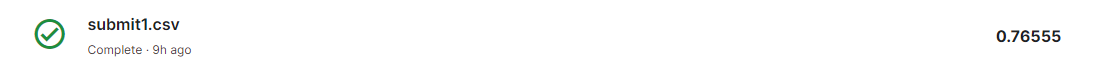

# 2. 수치형 데이터 - 결측치 처리, binary encoding, 파생변수 만들기

In [61]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [63]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
Survived      0
dtype: int64

In [64]:
# 먼저 Sex를 binary encoding 해줍니다.
train["Sex"] = train["Sex"] == "female"
test["Sex"] = test["Sex"] == "female"

In [65]:
# Age의 결측치를 채워줍니다.
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(train["Age"].median())

In [66]:
# Fare의 결측치를 채워줍니다.
train["Fare"] = train["Fare"].fillna(train["Fare"].median())
test["Fare"] = test["Fare"].fillna(test["Fare"].median())

In [67]:
# 가족의 수(FamilySize) 파생 변수 칼럼을 만들어 줍니다.
# 가족의 수 == Parch + SibSp + 1(나)
train["FamilySize"] = train["Parch"] + train["SibSp"] + 1
test["FamilySize"] = test["Parch"] + test["SibSp"] + 1

In [73]:
# target(label) 컬럼을 구분합니다.
label_name = "Survived"
feature_names = train.select_dtypes(include="number").columns.drop(label_name)

In [74]:
# 학습 데이터를 나누어줍니다.
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [75]:
# 머신러닝 알고리즘(DecisionTreeClassifier)를 불러옵니다.
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [76]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [77]:
y_predict = model.predict(X_test)

In [78]:
test["Survived"] = y_predict

In [79]:
submit = test["Survived"]
submit.to_csv("data/titanic/submit2.csv")

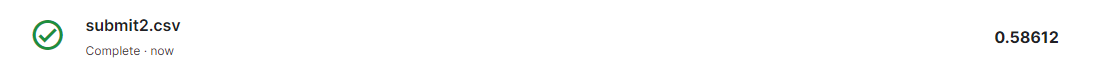

오히려 예측 점수가 더 떨어졌다.

<AxesSubplot:>

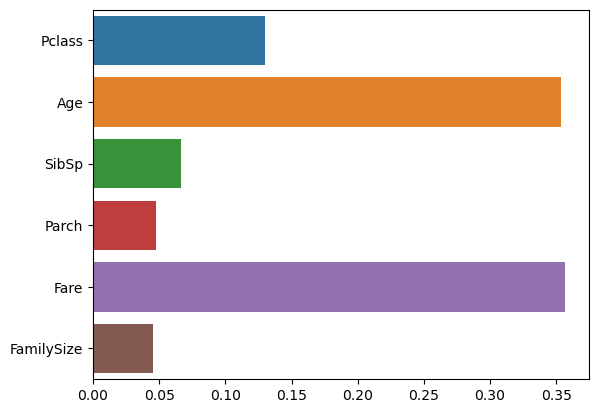

In [20]:
sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)

In [21]:
# FamilySize 파생변수를 만들면서 필요없어진 Parch와 SibSp를 지워줍니다.
train = train.drop(columns = ["Parch", "SibSp"])
test = test.drop(columns = ["Parch", "SibSp"])

In [22]:
# feature_names 컬럼을 다시 정의해줍니다.
feature_names = train.select_dtypes(include="number").columns.drop(label_name)

In [23]:
# 학습 데이터를 다시 나누어줍니다.
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [24]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
y_predict = model.predict(X_test)

In [26]:
test["Survived"] = y_predict

In [27]:
submit = test["Survived"]
submit.to_csv("data/titanic/submit2-2.csv")

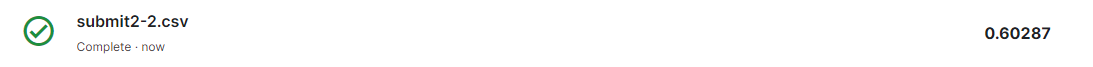

필요없는 컬럼을 삭제하니 점수가 조금 더 올랐음을 확인할 수 있습니다.

# 3. 범주형 데이터 - 결측치 처리,  onehotencoding, 파생변수 만들기

In [28]:
train.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin         687
Embarked        2
FamilySize      0
dtype: int64

In [29]:
# Cabin에 결측치를 채워줍니다
# 알파벳의 이니셜만 넣습니다
# 없는 값에 의미를 부여하고 싶다면 없는 값은 이니셜 "N" 으로 대체해주도록 하겠습니다.
train["Cabin"] = train["Cabin"]
train["Cabin"] = train["Cabin"].fillna("N").str[0]
train["Cabin"].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [30]:
# 이 작업을 하는 이유 : 객실 번호가 T는 하나 입니다. 그래서 다른 값으로 대체가 필요합니다.
# 요금의 평균으로 T객실의 요금과 비슷한 객실로 객실 이니셜 값을 변경해 주도록 합니다.
# 값을 대체할 때는 도메인 지식을 활용해야 하지만 일단 기존 데이터의 Fare를 참고했습니다.
train.groupby("Cabin")["Fare"].mean()

Cabin
A     39.623887
B    113.505764
C    100.151341
D     57.244576
E     46.026694
F     18.696792
G     13.581250
N     19.157325
T     35.500000
Name: Fare, dtype: float64

In [31]:
train["Cabin"] = train["Cabin"].replace("T", "A")

In [32]:
# Test에도 동일하게 해주었습니다.
test["Cabin"] = test["Cabin"]
test["Cabin"] = test["Cabin"].fillna("N").str[0]
test["Cabin"] = test["Cabin"].replace("T", "A")

In [34]:
# Name 칼럼에 있는 호칭만 추출합니다
train["Title"] = train["Name"].map(
    lambda x : x.split(".")[0].split()[-1].strip())
test["Title"] = test["Name"].map(
    lambda x : x.split(".")[0].split()[-1].strip())

In [35]:
train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [36]:
# 2개 이하(2개나 1개만 있는 호칭은 Etc로 묶어주도록 하겠습니다.)
title_count = train["Title"].value_counts()
title_etc = title_count[title_count <= 2].index

train["Title"] = train["Title"]
train.loc[train["Title"].isin(title_etc), "Title"] = "Etc"

test["Title"] = test["Title"]
test.loc[test["Title"].isin(title_etc), "Title"] = "Etc"

In [37]:
# Name 칼럼들은 지워줍니다
train = train.drop(columns = "Name")
test = test.drop(columns = "Name")

In [38]:
train[["Ticket"]]

,Ticket
PassengerId,
1,A/5 21171
2,PC 17599
3,STON/O2. 3101282
4,113803
5,373450
...,...
887,211536
888,112053
889,W./C. 6607


In [39]:
# Ticket 컬럼도 그냥 지워줍니다
train = train.drop(columns = "Ticket")
test = test.drop(columns = "Ticket")

In [40]:
# get_dummies를 이용해 원핫인코딩을 합니다.
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [41]:
# feature_names 컬럼을 다시 정의해줍니다.
feature_names = train.columns.drop(label_name)

In [42]:
# 학습 데이터를 다시 나누어줍니다.
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

In [43]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
y_predict = model.predict(X_test)

In [45]:
test["Survived"] = y_predict

In [46]:
submit = test["Survived"]
submit.to_csv("data/titanic/submit3.csv")

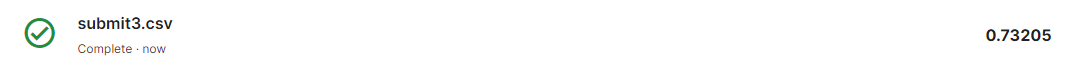

# 4. RandomForest와 하이퍼파라미터 조절하기(RandomGridCV)

In [47]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [48]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth": np.random.randint(3, 100, 10), 
                       "max_features": np.random.uniform(0, 1, 10)}

clf = RandomizedSearchCV(estimator=model, 
                         param_distributions=param_distributions,
                         n_iter=5,
                         n_jobs=-1,
                         random_state=42,
                         verbose=2
                        )

clf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': array([79, 92, 10, 61, 93, 48, 42,  7, 31, 78]),
                                        'max_features': array([0.97885493, 0.05450763, 0.04878351, 0.98578815, 0.44825204,
       0.30029647, 0.56324653, 0.21145287, 0.1889494 , 0.90385252])},
                   random_state=42, verbose=2)

In [49]:
model = clf.best_estimator_

In [50]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=0.9788549272152773)

In [51]:
y_predict = model.predict(X_test)

In [52]:
test["Survived"] = y_predict

In [53]:
submit = test["Survived"]
submit.to_csv("data/titanic/submit4.csv")

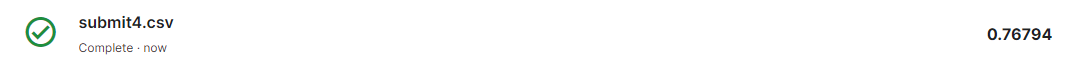